## Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Load Dataset

In [2]:
df = pd.read_csv('movie review.csv',sep='\t')

df.head()

,id,review,sentiment
0,5814_8,With all this stuff going down at the moment w...,1
1,2381_9,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,7759_3,The film starts with a manager (Nicholas Bell)...,0
3,3630_4,It must be assumed that those who praised this...,0
4,9495_8,Superbly trashy and wondrously unpretentious 8...,1


In [3]:
#Dropping unwanted columns
df.drop('id',inplace=True,axis=1)

In [4]:
df.head()

,review,sentiment
0,With all this stuff going down at the moment w...,1
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,The film starts with a manager (Nicholas Bell)...,0
3,It must be assumed that those who praised this...,0
4,Superbly trashy and wondrously unpretentious 8...,1


## Data Preprocessing

In [5]:
df.dropna(axis=1)

,review,sentiment
0,With all this stuff going down at the moment w...,1
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,The film starts with a manager (Nicholas Bell)...,0
3,It must be assumed that those who praised this...,0
4,Superbly trashy and wondrously unpretentious 8...,1
...,...,...
22495,It seems like more consideration has gone into...,0
22496,I don't believe they made this film. Completel...,0
22497,"Guy is a loser. Can't get girls, needs to buil...",0
22498,This 30 minute documentary BuÃ±uel made in the...,0


In [6]:
#Removing null values
df.dropna(inplace=True)

In [7]:
#Function to remove all unwanted characters in our data
def clean(text):
    text = re.sub(r'http://S+|https://S+',' ',text)
    text = re.sub("[^a-zA-Z]+"," ",text)
    text = re.sub(" s "," ",text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r"rt ", "", text)
    text = text.lower()
    text = text.lstrip().rstrip()
    return text

In [8]:
cleaned_df = [clean(text) for text in df["review"]]

In [9]:
print(cleaned_df[1:100])

['the classic war of the worlds by timothy hines is a very entertaining film that obviously goes to great effoand lengths to faithfully recreate h g wells classic book mr hines succeeds in doing so i and those who watched his film with me appreciated the fact that it was not the standard predictable hollywood fare that comes out every year e g the spielberg version with tom cruise that had only the slightest resemblance to the book obviously everyone looks for different things in a movie those who envision themselves as amateur critics look only to criticize everything they can others rate a movie on more important bases like being entertained which is why most people never agree with the critics we enjoyed the effomr hines put into being faithful to h g wells classic novel and we found it to be very entertaining this made it easy to overlook what the critics perceive to be its shortcomings', 'the film starts with a manager nicholas bell giving welcome investors robecarradine to primal

## Tokenisation

In [10]:
x = [nltk.word_tokenize(w) for w in cleaned_df]

## Lemmatization

In [11]:
lemma = WordNetLemmatizer()
lemmatized = [[lemma.lemmatize(w) for w in text] for text in x]

## Removal of Stopwords

In [12]:
without_stopwords = [[w for w in text if w not in stopwords.words('english')] for text in lemmatized]

## Vectorization

In [13]:
vectorizer = CountVectorizer(max_features=50000,analyzer='word',stop_words = 'english')
X = vectorizer.fit_transform([' '.join(text) for text in without_stopwords]).toarray()

In [14]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Data Summarization

In [15]:
df.describe()

,sentiment
count,22500.000000
mean,0.501244
std,0.500010
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [16]:
df['sentiment'].value_counts()

1    11278
0    11222
Name: sentiment, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 0 to 22499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     22500 non-null  object
 1   sentiment  22500 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 527.3+ KB


In [18]:
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


## Data Visualization

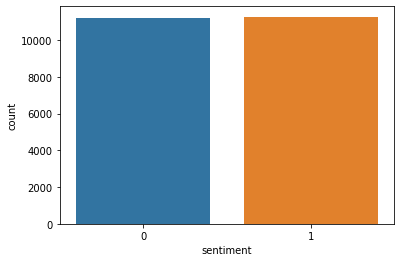

In [19]:
sns.countplot(x='sentiment',data = df)
plt.show()

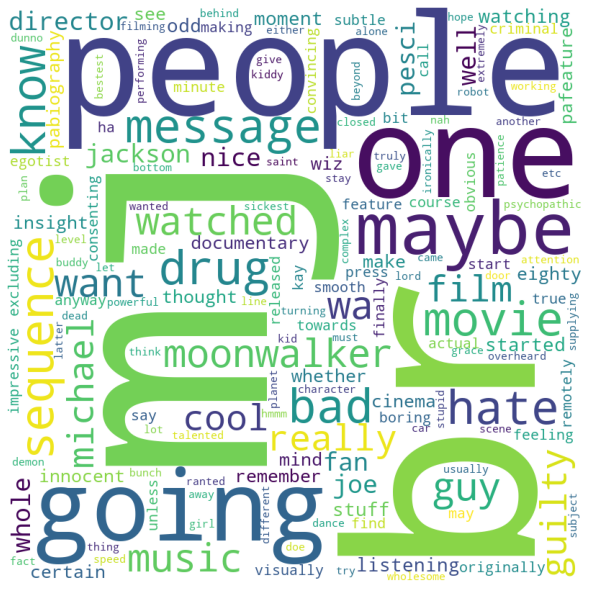

In [20]:
w = [' '.join(text) for text in without_stopwords]
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(w[0])
                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

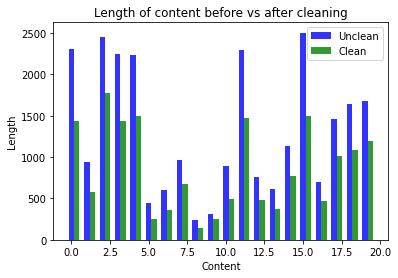

In [21]:
unclean = [len(x) for x in df["review"]]
clean = [len(y) for y in w]

n_groups = 20
a = unclean[:20]
b = clean[:20]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, a, bar_width,
                    alpha=opacity,  
                    color='b',
                    label='Unclean')

rects2 = plt.bar(index + bar_width, b, bar_width, 
                    alpha=opacity,  
                    color='g',  
                    label='Clean')

plt.xlabel('Content')
plt.ylabel('Length')
plt.title('Length of content before vs after cleaning')
plt.legend()

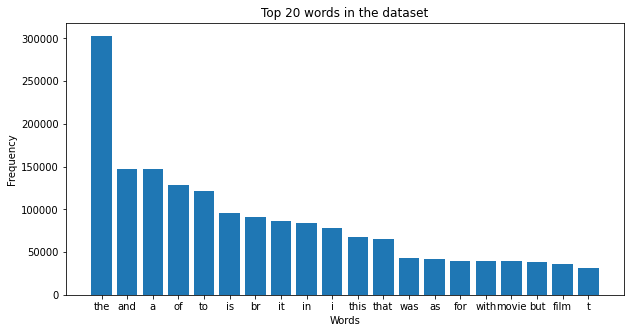

In [22]:
def top_words(cleaned_df):
    # create a dictionary to store the words and their frequency
    word_dict = {}
    for text in cleaned_df:
        for word in text.split():
            if word in word_dict:
                word_dict[word] += 1
            else:
                word_dict[word] = 1
    # sort the dictionary by values
    sorted_dict = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
    # get the top 20 words
    top_words = sorted_dict[:20]
    # get the top 20 words and their frequency
    top_words, top_freq = zip(*top_words)
    # plot the top 20 words and their frequency
    plt.figure(figsize=(10, 5))
    plt.bar(top_words, top_freq)
    plt.title('Top 20 words in the dataset')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

top_words(cleaned_df)

In [23]:
# save list to csv file
def save_list(without_stopwords, cleaneddataset1):
    # convert list to dataframe
    df = pd.DataFrame(without_stopwords)
    # save to csv file
    df.to_csv(cleaneddataset1, index= False)

In [24]:
save_list(w, 'cleaneddataset2.csv')